In [ ]:
%pip install opendatasets
import opendatasets as od
import pandas
 
od.download("https://www.kaggle.com/datasets/arpan2022/carcolourdataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arpan2022
Your Kaggle Key: ··········


100%|██████████| 574M/574M [00:09<00:00, 60.9MB/s]


In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import tensorflow as tf
import matplotlib.colors as colors


In [ ]:
# Define the paths to the datasets
testing_dataset = '/content/carcolourdataset/test'
training_dataset = '/content/carcolourdataset/train'
validation_dataset = '/content/carcolourdataset/val'

## EDA

### 1 - Checking labels & images in the dataset

The code counts the number of images and labels in three datasets using a function called get_num_images_labels. It iterates over the subdirectories in each dataset, counts the number of images in each subdirectory, and appends the label to a list. The code then prints the number of images and labels in each dataset. This is useful for analysing and balancing datasets in machine learning applications.

In [ ]:
# Define a function to get the number of images and labels in a dataset
def get_num_images_labels(dataset):
    num_images = 0
    labels = []
    for label in os.listdir(dataset):
        label_path = os.path.join(dataset, label)
        num_images += len(os.listdir(label_path))
        labels.append(label)
    return num_images, labels

# Get the number of images and labels in each dataset
num_testing_images, testing_labels = get_num_images_labels(testing_dataset)
num_train_images, train_labels = get_num_images_labels(training_dataset)
num_validation_images, validation_labels = get_num_images_labels(validation_dataset)

# Print the number of images and labels in each dataset
print("Number of testing images: ", num_testing_images)
print("Testing labels: ", testing_labels)
print("Number of training images: ", num_train_images)
print("Training labels: ", train_labels)
print("Number of validation images: ", num_validation_images)
print("Validation labels: ", validation_labels)

Number of testing images:  1556
Testing labels:  ['grey', 'orange', 'purple', 'yellow', 'beige', 'green', 'pink', 'red', 'silver', 'blue', 'white', 'tan', 'black', 'brown', 'gold']
Number of training images:  7267
Training labels:  ['grey', 'orange', 'purple', 'yellow', 'beige', 'green', 'pink', 'red', 'silver', 'blue', 'white', 'tan', 'black', 'brown', 'gold']
Number of validation images:  1550
Validation labels:  ['grey', 'orange', 'purple', 'yellow', 'beige', 'green', 'pink', 'red', 'silver', 'blue', 'white', 'tan', 'black', 'brown', 'gold']


### 2 - Checking the count of images per label

The “get_image_count_per_class” method counts the number of images in each class within a dataset directory. It does this by iterating through each sub-directory (class), counting the number of images in it, and storing the count as a value in a dictionary with the class name as the key.
The code prints the count of images per class for all three subsets (testing_dataset, training_dataset, and validation_dataset). To store the count of images per class, the first part of the code uses a dictionary named "all_datasets_image_count_per_class". This code iterates over each dataset (testing_dataset, training_dataset, and validation_dataset) and uses a function called "get_image_count_per_class" to calculate the number of images per class. Afterwards, it iterates over the list of class names and image counts in the "image_count_per_class" dictionary. It adds the count to the corresponding class in the "all_datasets_image_count_per_class" dictionary corresponding to the class in the "image_count_per_class" dictionary. Finally, the code prints a dictionary of image counts across all three subsets.


In [ ]:
# Define a function to get the count of images per class
def get_image_count_per_class(dataset_path):
    image_count_per_class = {}
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            image_count = len(os.listdir(class_path))
            image_count_per_class[class_name] = image_count
    return image_count_per_class

In [ ]:
# Get the count of images per class in each dataset
testing_image_count_per_class = get_image_count_per_class(testing_dataset)
training_image_count_per_class = get_image_count_per_class(training_dataset)
validation_image_count_per_class = get_image_count_per_class(validation_dataset)

# Print the count of images per class in each dataset
print('Testing Dataset:')
print(testing_image_count_per_class)
print('')

print('Training Dataset:')
print(training_image_count_per_class)
print('')

print('Validation Dataset:')
print(validation_image_count_per_class)

Testing Dataset:
{'brown': 121, 'tan': 86, 'grey': 92, 'red': 136, 'beige': 90, 'silver': 77, 'orange': 114, 'black': 87, 'white': 86, 'yellow': 124, 'gold': 45, 'green': 121, 'pink': 103, 'blue': 159, 'purple': 115}

Training Dataset:
{'brown': 565, 'tan': 400, 'grey': 428, 'red': 637, 'beige': 421, 'silver': 362, 'orange': 534, 'black': 406, 'white': 403, 'yellow': 577, 'gold': 210, 'green': 563, 'pink': 483, 'blue': 742, 'purple': 536}

Validation Dataset:
{'brown': 121, 'tan': 85, 'grey': 91, 'red': 136, 'beige': 90, 'silver': 77, 'orange': 114, 'black': 86, 'white': 86, 'yellow': 123, 'gold': 45, 'green': 120, 'pink': 103, 'blue': 159, 'purple': 114}


In [ ]:
# Get the count of images per class for all three datasets combined
all_datasets_image_count_per_class = {}
for dataset_path in [testing_dataset, training_dataset, validation_dataset]:
    image_count_per_class = get_image_count_per_class(dataset_path)
    for class_name, image_count in image_count_per_class.items():
        if class_name in all_datasets_image_count_per_class:
            all_datasets_image_count_per_class[class_name] += image_count
        else:
            all_datasets_image_count_per_class[class_name] = image_count

# Print the count of images per class for all three datasets combined
print('All Datasets:')
print(all_datasets_image_count_per_class)

All Datasets:
{'brown': 807, 'tan': 571, 'grey': 611, 'red': 909, 'beige': 601, 'silver': 516, 'orange': 762, 'black': 579, 'white': 575, 'yellow': 824, 'gold': 300, 'green': 804, 'pink': 689, 'blue': 1060, 'purple': 765}


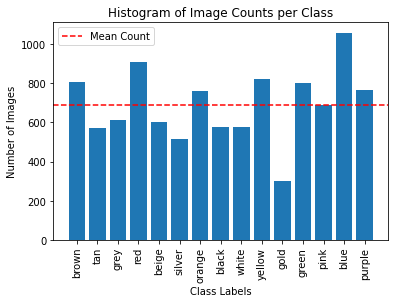

In [ ]:
# Convert the dictionary of image counts per class to a list of counts and labels
counts = list(all_datasets_image_count_per_class.values())
labels = list(all_datasets_image_count_per_class.keys())

# Calculate the mean of the image counts
mean_count = np.mean(counts)

# Create a histogram using Matplotlib
plt.bar(labels, counts)
plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Histogram of Image Counts per Class')

# Add a mean line to the histogram
plt.axhline(y=mean_count, color='r', linestyle='--', label='Mean Count')

plt.xticks(rotation=90)
plt.legend()
plt.show()

### 3 - Checking image width and height frequency

This code defines a function get_image_sizes that takes a path to a dataset and returns a set of unique image sizes (width and height) for all images in the dataset.

The function iterates through each class in the dataset (assuming a directory structure where each subdirectory is a class), reads in each image using cv2.imread, and adds its shape (width and height) to a set. This ensures that only unique image sizes are returned.

The function is then called three times to get the unique image sizes for the training, validation, and testing datasets. The results are printed to the console.

After getting the unique image sizes for all three datasets, the code extracts the width and height ranges from the sizes by creating two lists (width_range and height_range) and appending all the width and height values to these lists.

In [ ]:
# Function to get the unique image sizes in a dataset
def get_image_sizes(dataset_path):
    sizes = set()
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)
                sizes.add(img.shape[:2])
    return sizes

# Get the unique image sizes in the training dataset
train_sizes = get_image_sizes(training_dataset)
print('Training dataset image sizes:', train_sizes)

# Get the unique image sizes in the validation dataset
val_sizes = get_image_sizes(validation_dataset)
print('Validation dataset image sizes:', val_sizes)

# Get the unique image sizes in the testing dataset
test_sizes = get_image_sizes(testing_dataset)
print('Testing dataset image sizes:', test_sizes)

# Extract width and height ranges from the dataset sizes
width_range = [size[1] for size in train_sizes.union(val_sizes).union(test_sizes)]
height_range = [size[0] for size in train_sizes.union(val_sizes).union(test_sizes)]

Training dataset image sizes: {(369, 625), (159, 263), (118, 225), (71, 150), (150, 214), (136, 279), (153, 219), (882, 1560), (129, 276), (132, 281), (159, 384), (686, 1621), (122, 236), (380, 797), (498, 752), (429, 918), (96, 220), (127, 287), (236, 459), (90, 176), (117, 279), (254, 284), (92, 222), (572, 859), (96, 112), (113, 281), (85, 182), (145, 233), (131, 298), (122, 249), (287, 582), (328, 583), (106, 241), (59, 166), (119, 180), (124, 295), (143, 308), (163, 223), (96, 233), (472, 978), (140, 239), (112, 177), (131, 190), (117, 292), (188, 172), (133, 236), (606, 685), (152, 249), (284, 634), (275, 585), (149, 180), (629, 1571), (214, 309), (66, 182), (881, 1792), (458, 706), (106, 254), (147, 255), (100, 180), (119, 193), (58, 183), (163, 236), (77, 196), (94, 136), (140, 252), (79, 242), (370, 714), (98, 255), (82, 247), (114, 199), (94, 257), (88, 183), (126, 209), (109, 242), (147, 268), (144, 199), (149, 314), (61, 201), (121, 252), (80, 214), (79, 255), (337, 779), (

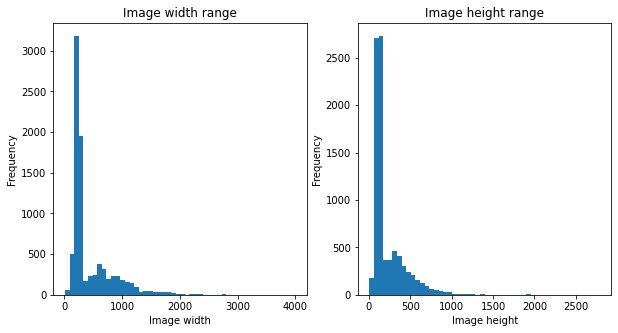

In [ ]:
# Plot the width and height ranges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(width_range, bins=50)
plt.xlabel('Image width')
plt.ylabel('Frequency')
plt.title('Image width range')

plt.subplot(1, 2, 2)
plt.hist(height_range, bins=50)
plt.xlabel('Image height')
plt.ylabel('Frequency')
plt.title('Image height range')

plt.show()

### 4 - Dataset image sampling

The given code defines a function named plot_sample_images that takes three arguments: dataset, label, and num_images. This function is designed to plot sample images from a given dataset directory, with a specific label.

The function first creates a path to the directory containing images with the given label within the dataset directory. It then lists the files in the label_path directory and selects the first num_images files. These are the images that will be plotted.

Next, the function creates a figure with num_images subplots arranged horisontally. It then iterates over the selected images and plots each image on its corresponding subplot. The title of each subplot is set to the given label, and the axis lines and ticks of each subplot are turned off.

Finally, the function displays the figure with the plotted images using the plt.show() function.

The code then calls the plot_sample_images function for each label in the train_labels list, passing in the training_dataset directory and num_images=6 as arguments. This will result in six sample images being plotted for each label in the train_labels list.

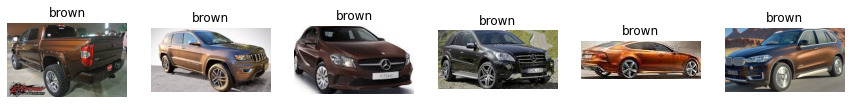

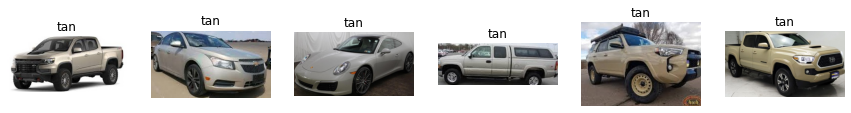

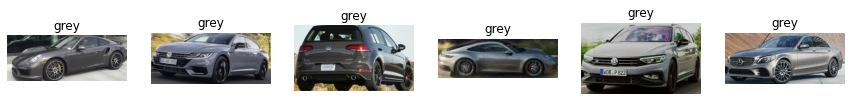

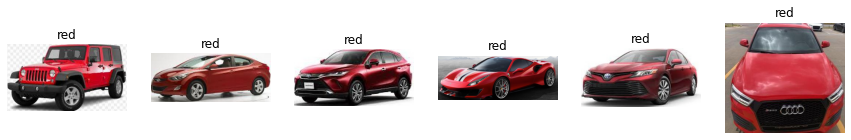

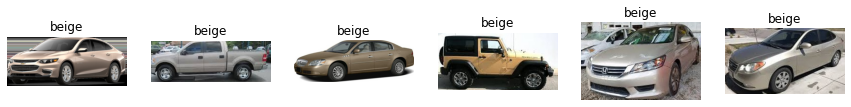

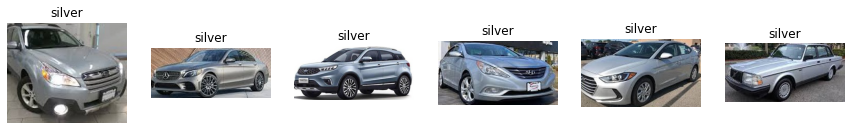

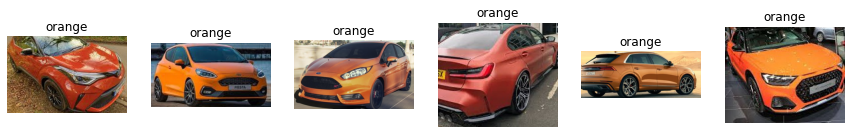

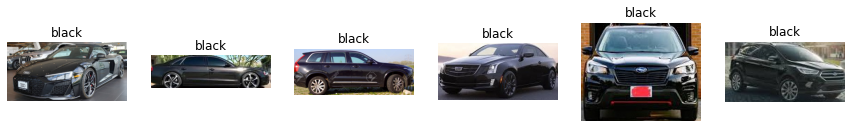

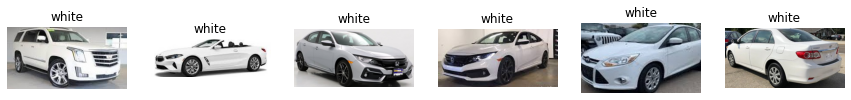

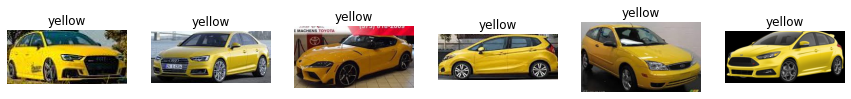

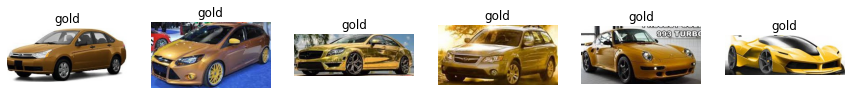

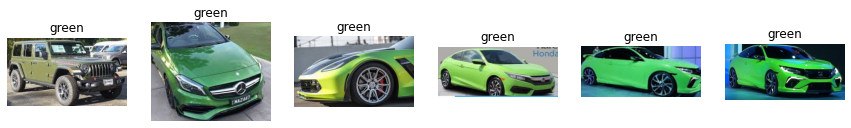

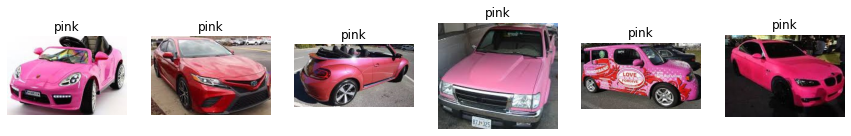

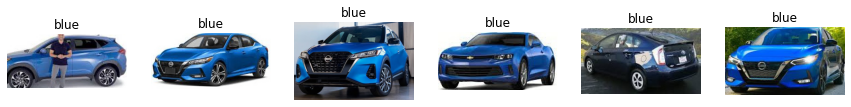

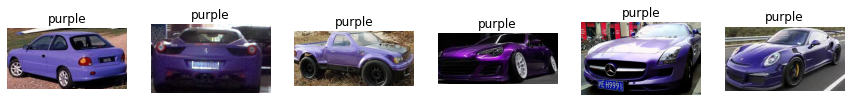

In [ ]:
def plot_sample_images(dataset, label, num_images=6):
    label_path = os.path.join(dataset, label)
    image_files = os.listdir(label_path)[:num_images]
    fig, ax = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        image_path = os.path.join(label_path, image_files[i])
        image = mpimg.imread(image_path)
        ax[i].imshow(image)
        ax[i].set_title(label)
        ax[i].axis('off')
    plt.show()



# Plot 6 sample images from each dataset with color labels    
for label in train_labels:
    plot_sample_images(training_dataset, label, num_images=6)


### 5 - Image colour frequancy

The provided code visualises color histograms for each class image in a training dataset using the Matplotlib library. The code first defines a list of colors called colors_list, which includes the color and opacity values for red, green, and blue. Then, the code lists the subdirectories in the training, testing, and validation datasets, which contain the images used to create histograms.

The width and height of the subplots are defined, and a for loop is used to iterate over each label in the train_labels list, which corresponds to the subdirectories in the training dataset. For each label, the code loads the first 10 images in the corresponding subdirectory. It then creates a figure with a set of subplots for each image using the fig, ax = plt.subplots(1, len(image_files), figsize=(width, height)) function.

In the inner for loop, the code loads each image and plots three histograms of its color channels (red, green, and blue) using the hist() function. The function takes as input the flattened color channel values, the number of bins for the histogram, the color and opacity values from the colors_list list, and the title of the subplot, which is set to the name of the image file. Finally, the title of the figure is set to the name of the current class, and the figure is displayed using the plt.show() function.

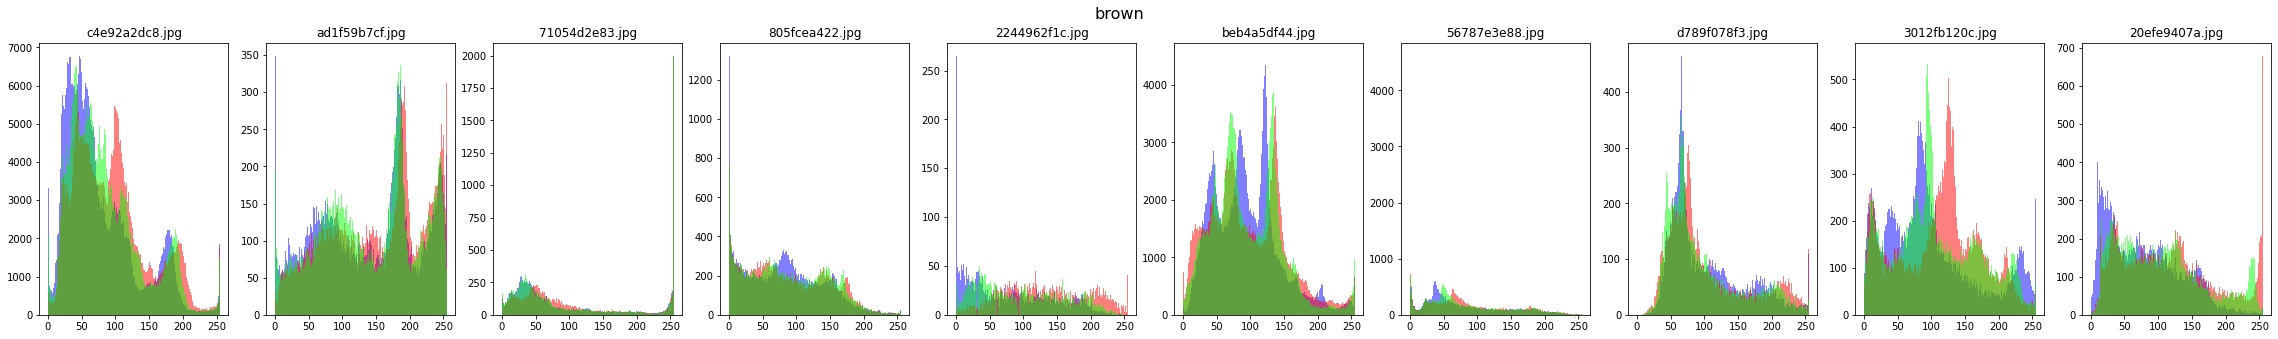

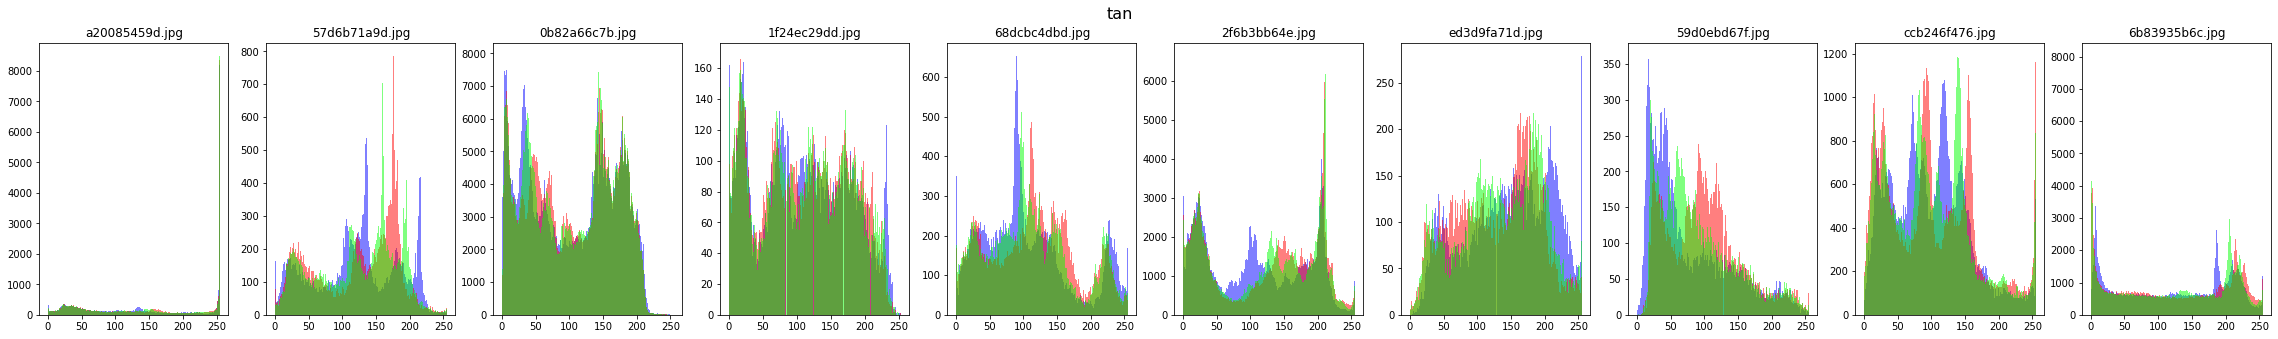

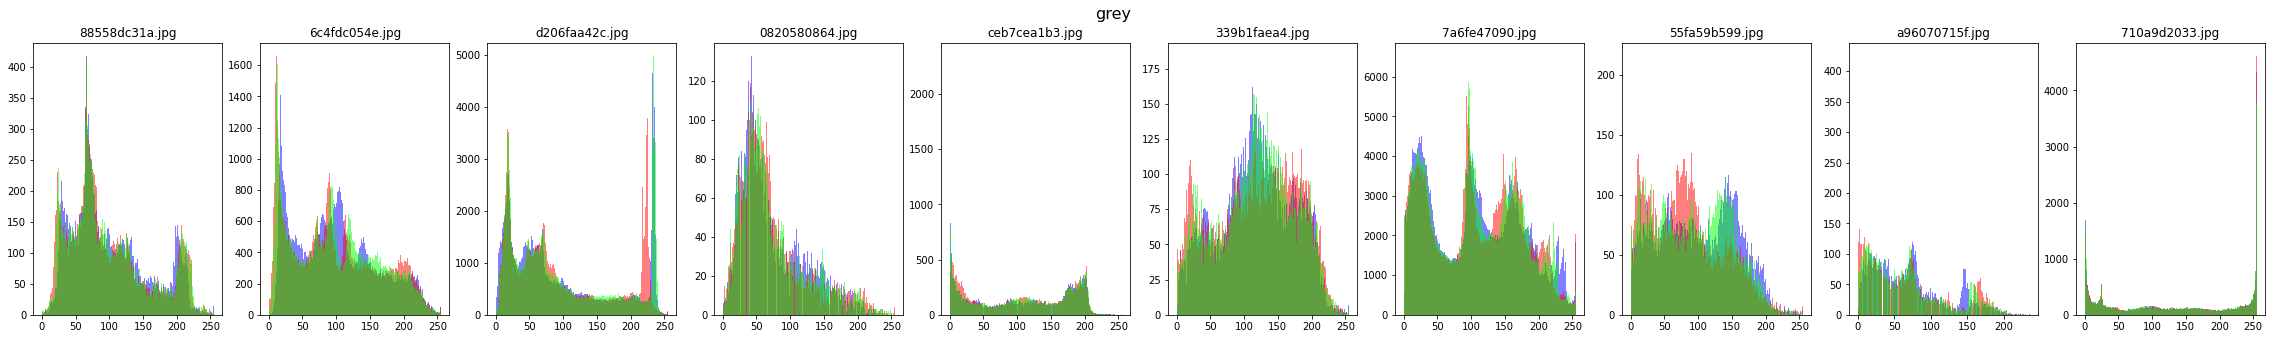

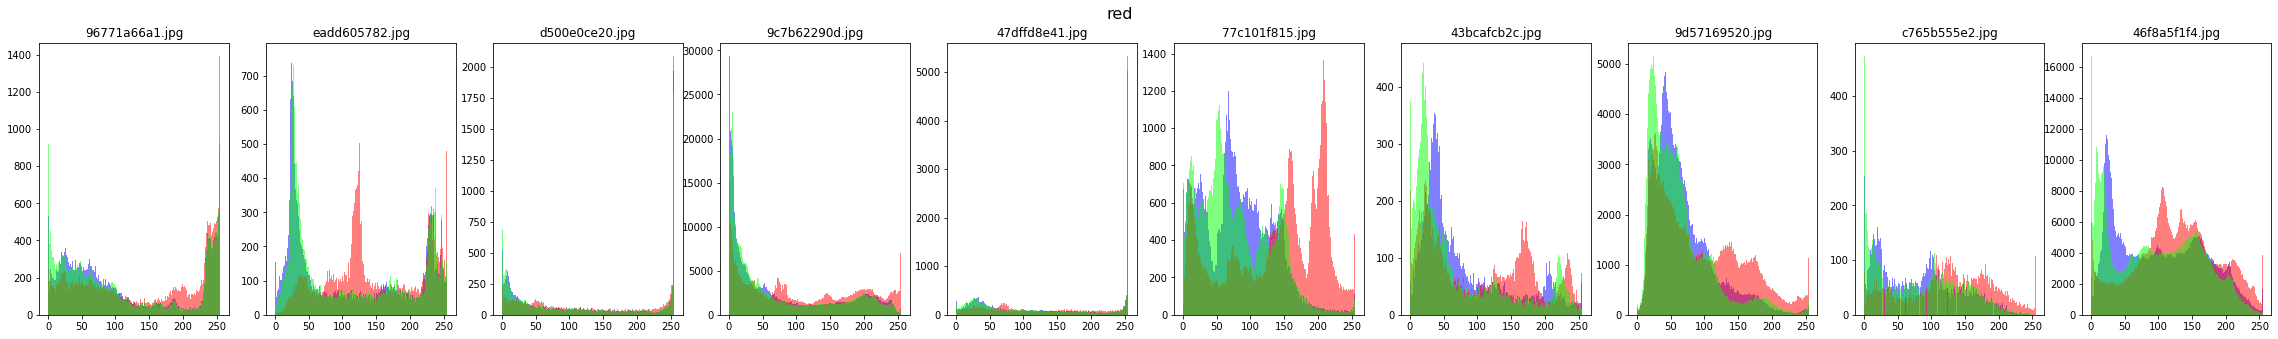

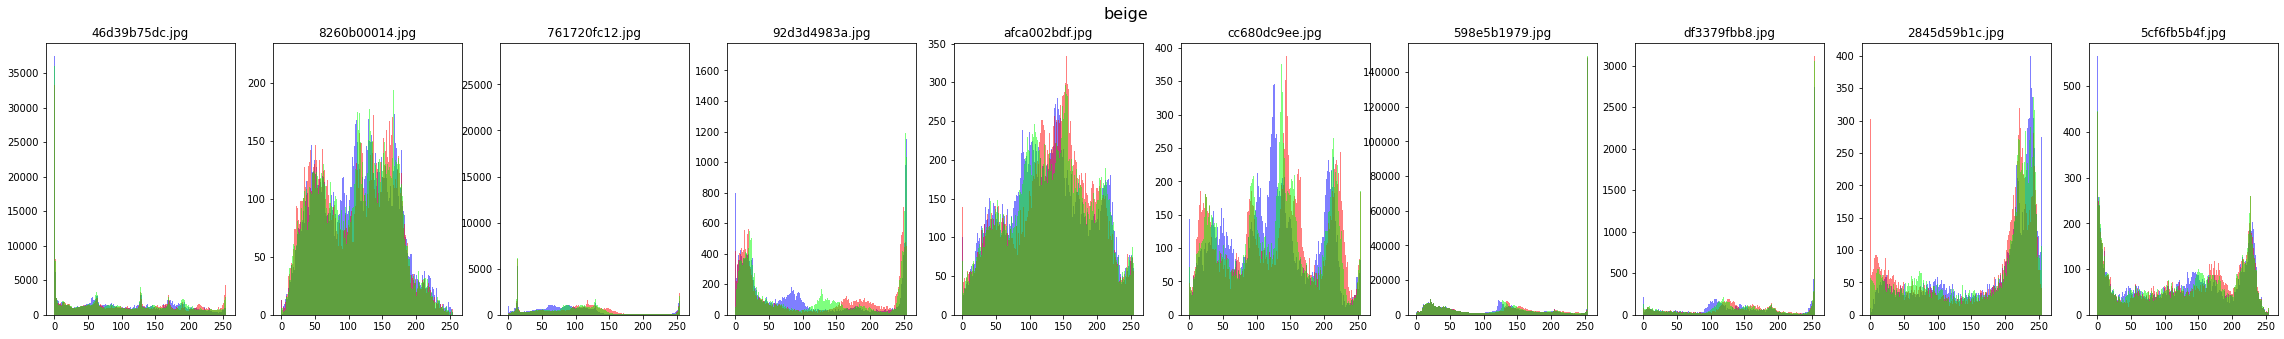

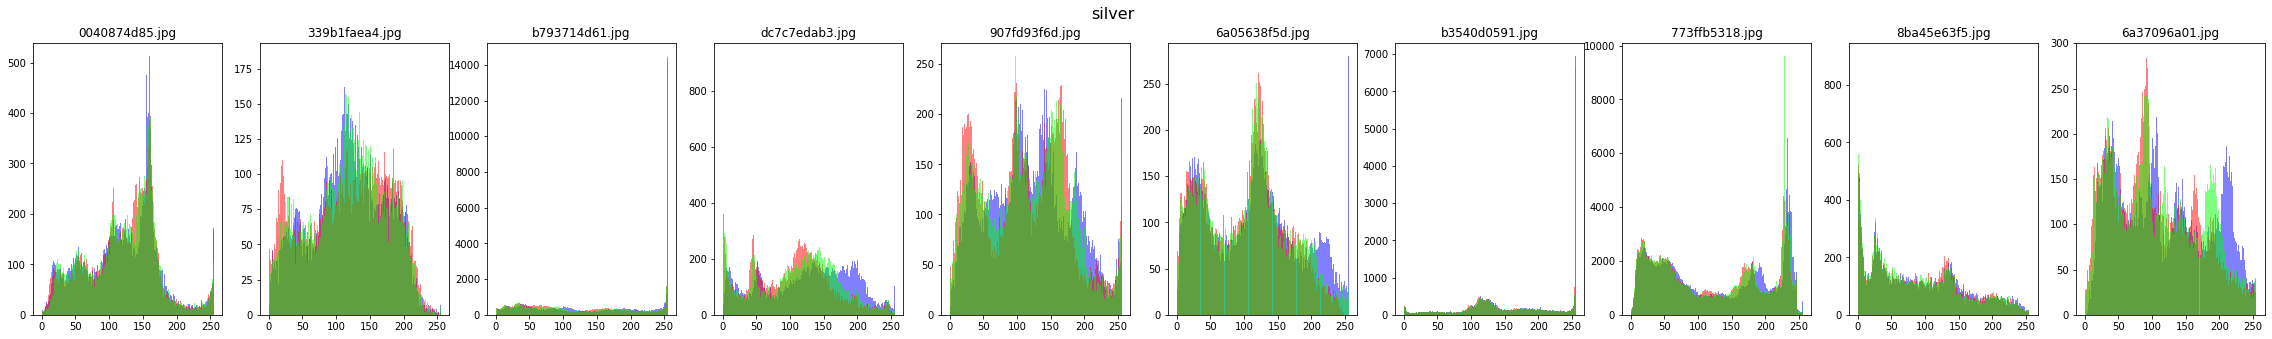

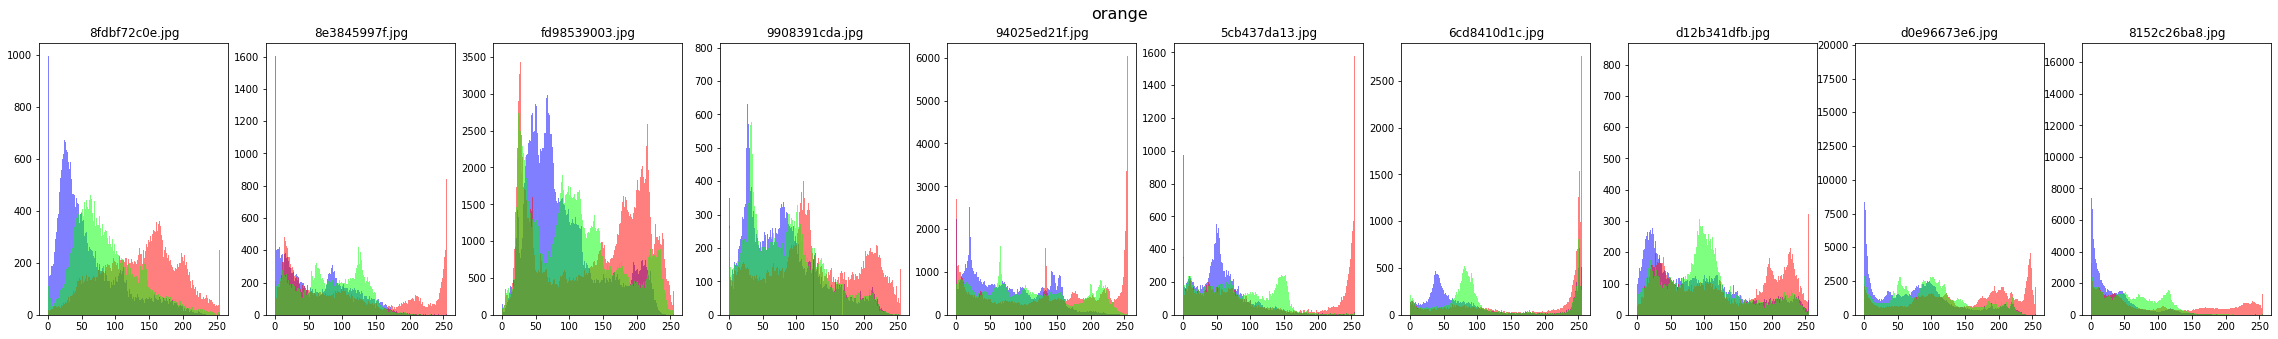

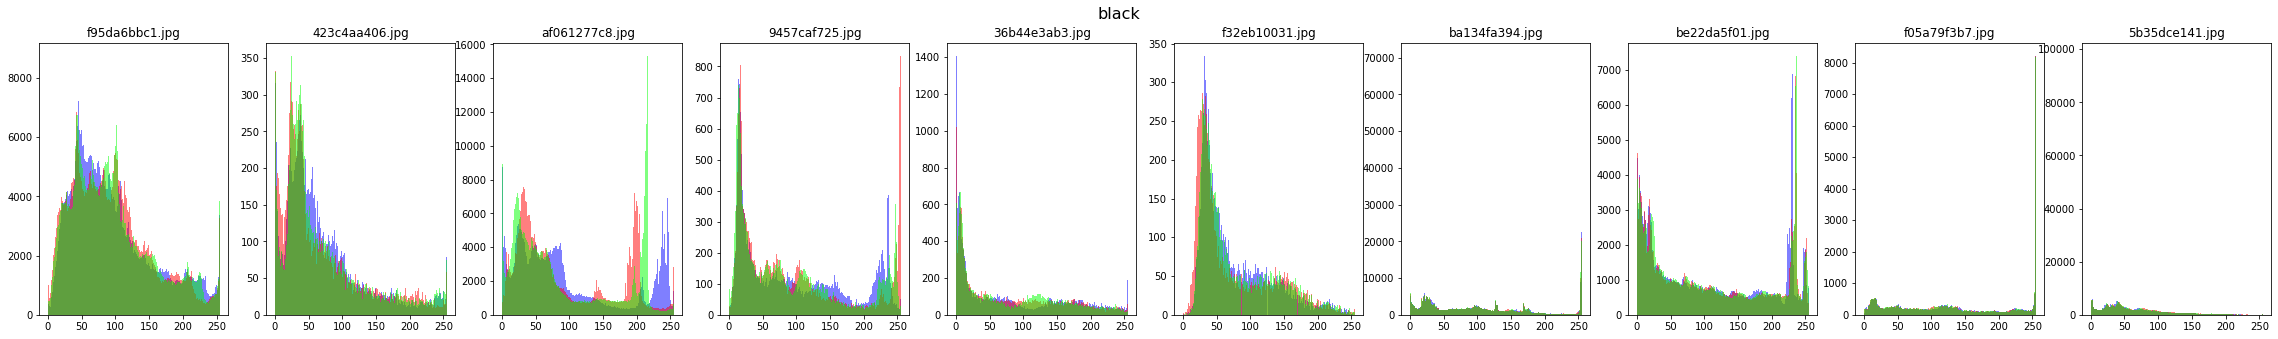

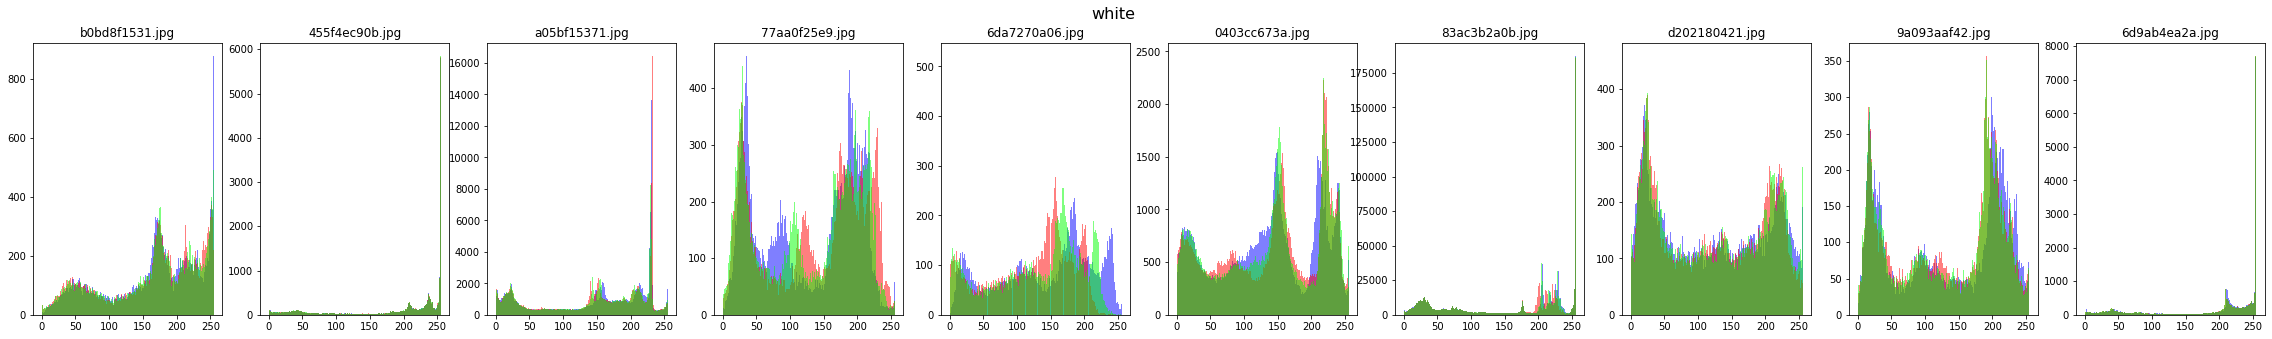

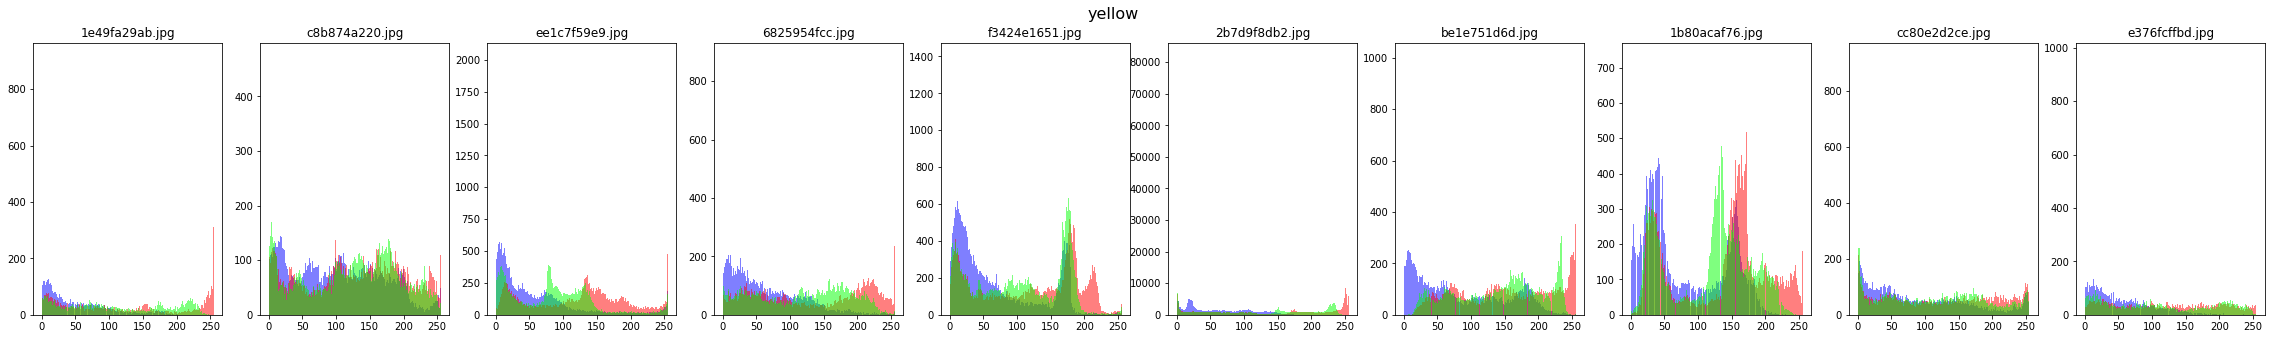

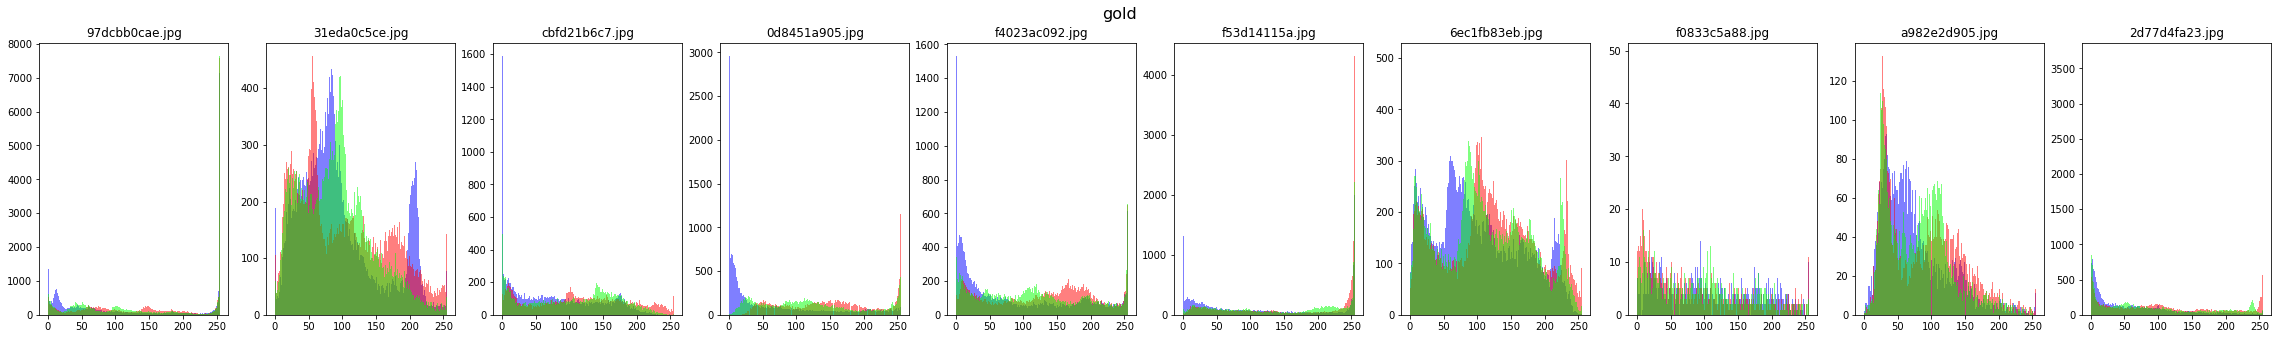

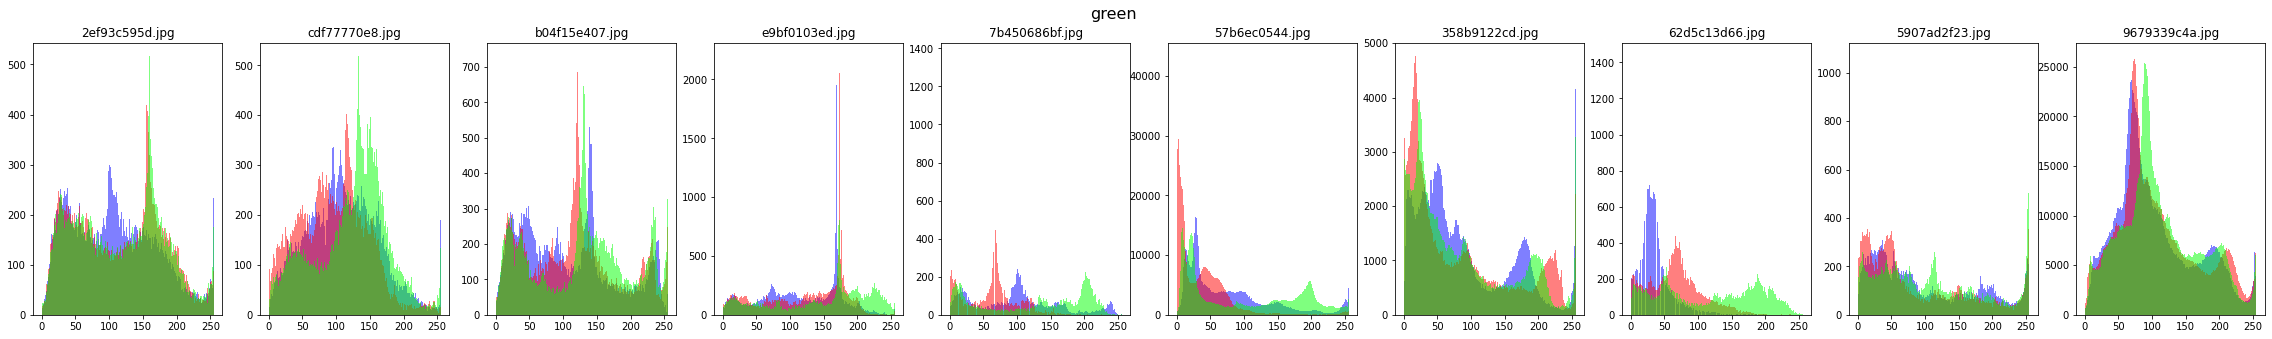

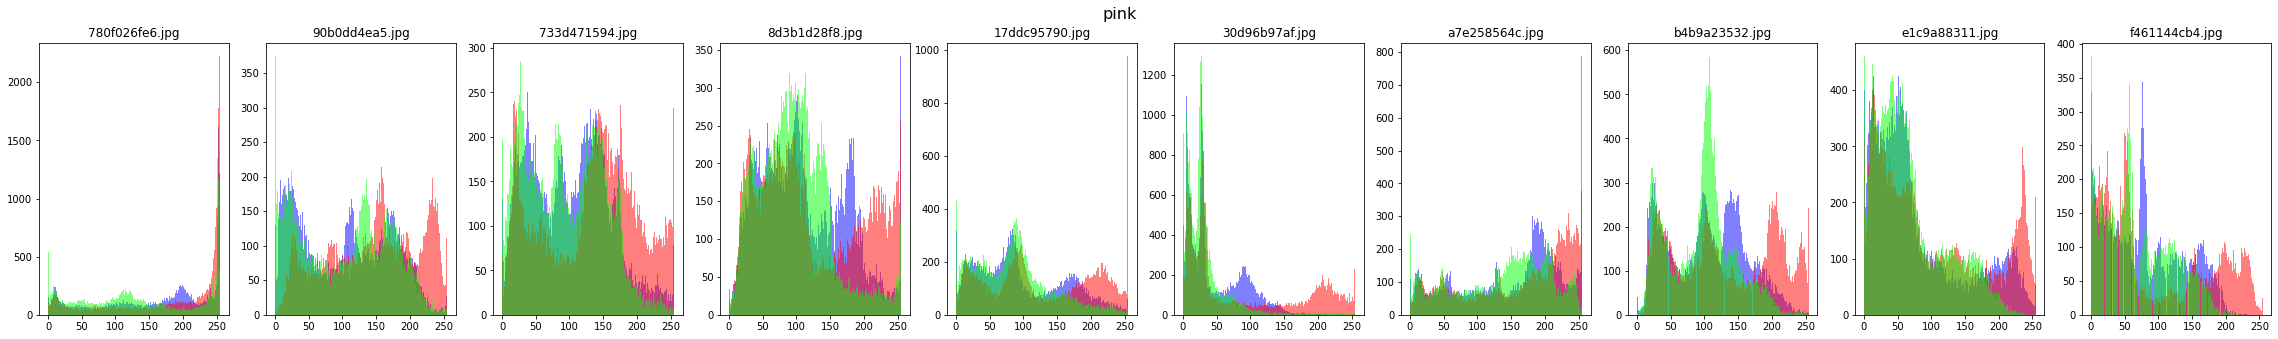

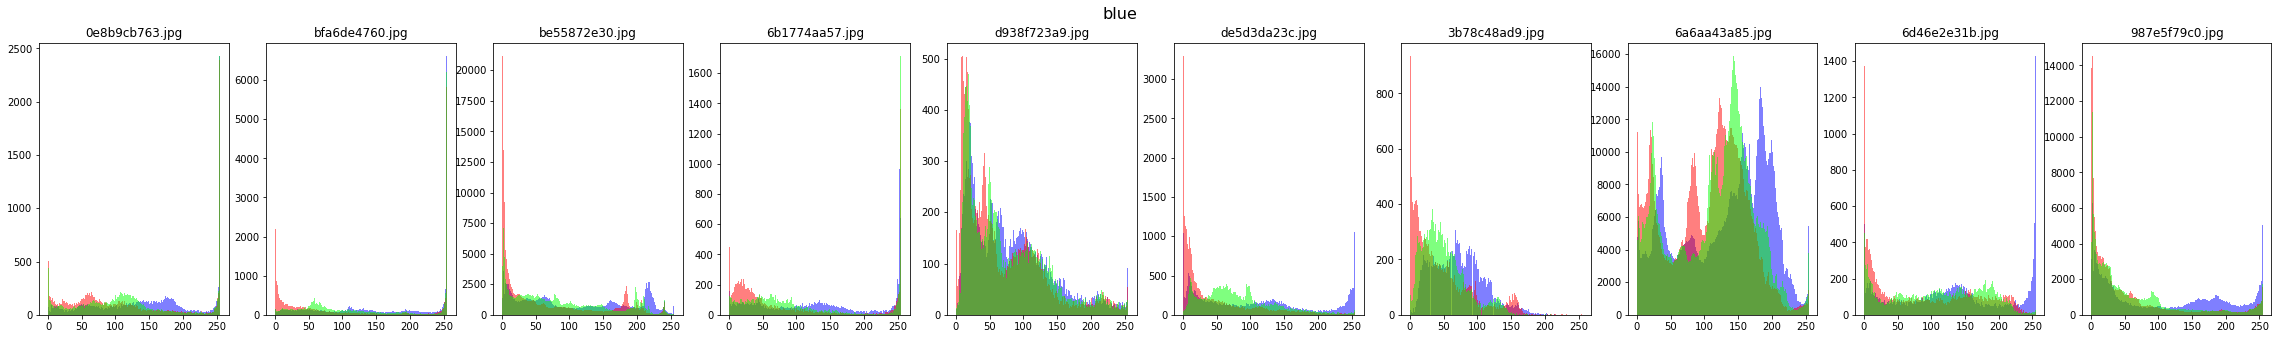

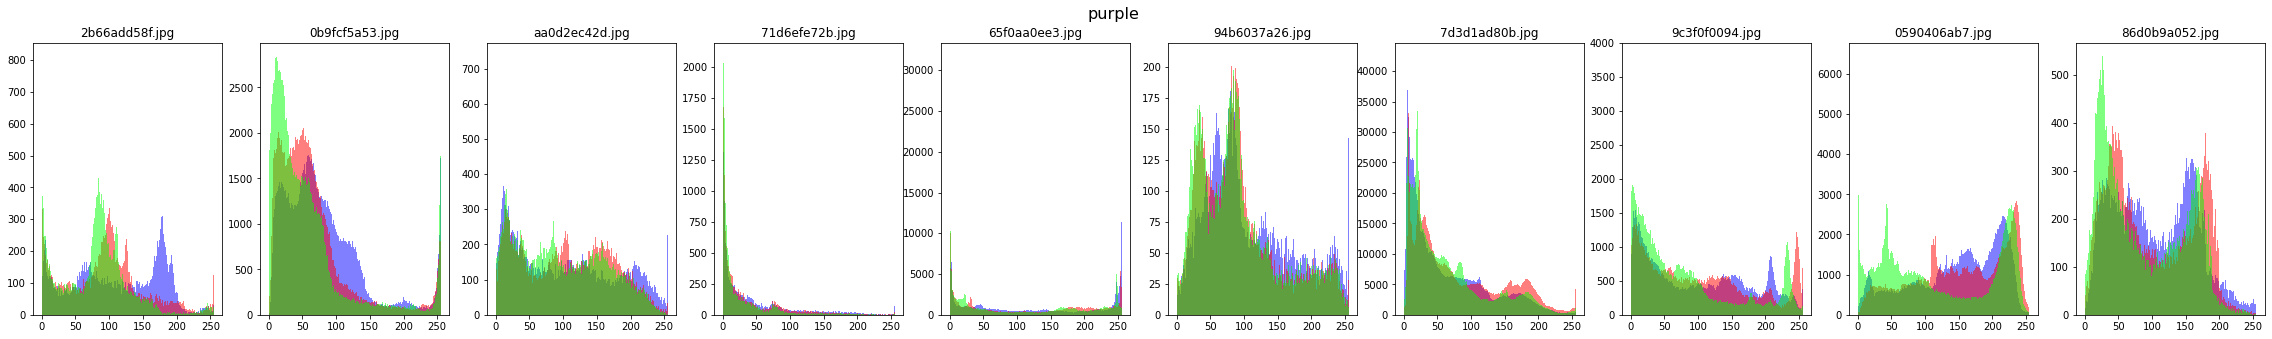

In [ ]:
colors_list = [(1.0, 0.0, 0.0, 0.99), (0.0, 1.0, 0.0, 0.99), (0.0, 0.0, 1.0, 0.99)] # Red, Green, Blue and their opacity


# Get a list of subdirectories within each dataset
testing_labels = os.listdir(testing_dataset)
train_labels = os.listdir(training_dataset)
validation_labels = os.listdir(validation_dataset)

# Set the width and height of the subplots
width = 40
height = 5

# Plot the color histograms for each class image
for label in train_labels:
    label_path = os.path.join(training_dataset, label)
    image_files = os.listdir(label_path)[:10]  # Limit the number of images per class to 10
    fig, ax = plt.subplots(1, len(image_files), figsize=(width, height))
    for i, image_file in enumerate(image_files):
        image_path = os.path.join(label_path, image_file)
        image = plt.imread(image_path)
        ax[i].hist(image[:,:,2].ravel(), bins=256, color=colors_list[2], alpha=0.5)
        ax[i].hist(image[:,:,0].ravel(), bins=256, color=colors_list[0], alpha=0.5)
        ax[i].hist(image[:,:,1].ravel(), bins=256, color=colors_list[1], alpha=0.5)        
        ax[i].set_title(image_file)
    fig.suptitle(label, fontsize=16)
    plt.show()

### 6 -  All classes images colour distribution

The code creates a 3D scatter plot for a given set of images. The plot displays the color distribution of the images in RGB color space.

The script starts by importing the necessary libraries including os, numpy, matplotlib.pyplot, and Axes3D from mpl_toolkits.mplot3d.

Then, there is a function called plot_3d_scatter which takes in a set of images, a title, and an axes object as inputs. This function extracts the RGB values of each image and normalizes them between 0 and 1. It then plots a 3D scatter plot using the normalized RGB values as the x, y, and z coordinates. Each point in the plot corresponds to a pixel in the image, and the color of the point is determined by the RGB values of that pixel.

The next section of the code reads a list of subdirectories within a training dataset using the os module. It then calculates the number of rows and columns needed to display the subplots in a grid format, based on the number of subdirectories.

The code then creates a single figure with multiple subplots, where each subplot corresponds to a different label (class) in the training dataset. For each label, the code reads a limited number of images (up to 10) from the corresponding subdirectory and creates a list of images. It then adds a new subplot to the figure using the add_subplot method and calls the plot_3d_scatter function with the list of images, the label name, and the axes object.

Finally, the layout of the figure is adjusted using the tight_layout method, and the figure is displayed using the show method from matplotlib.pyplot.

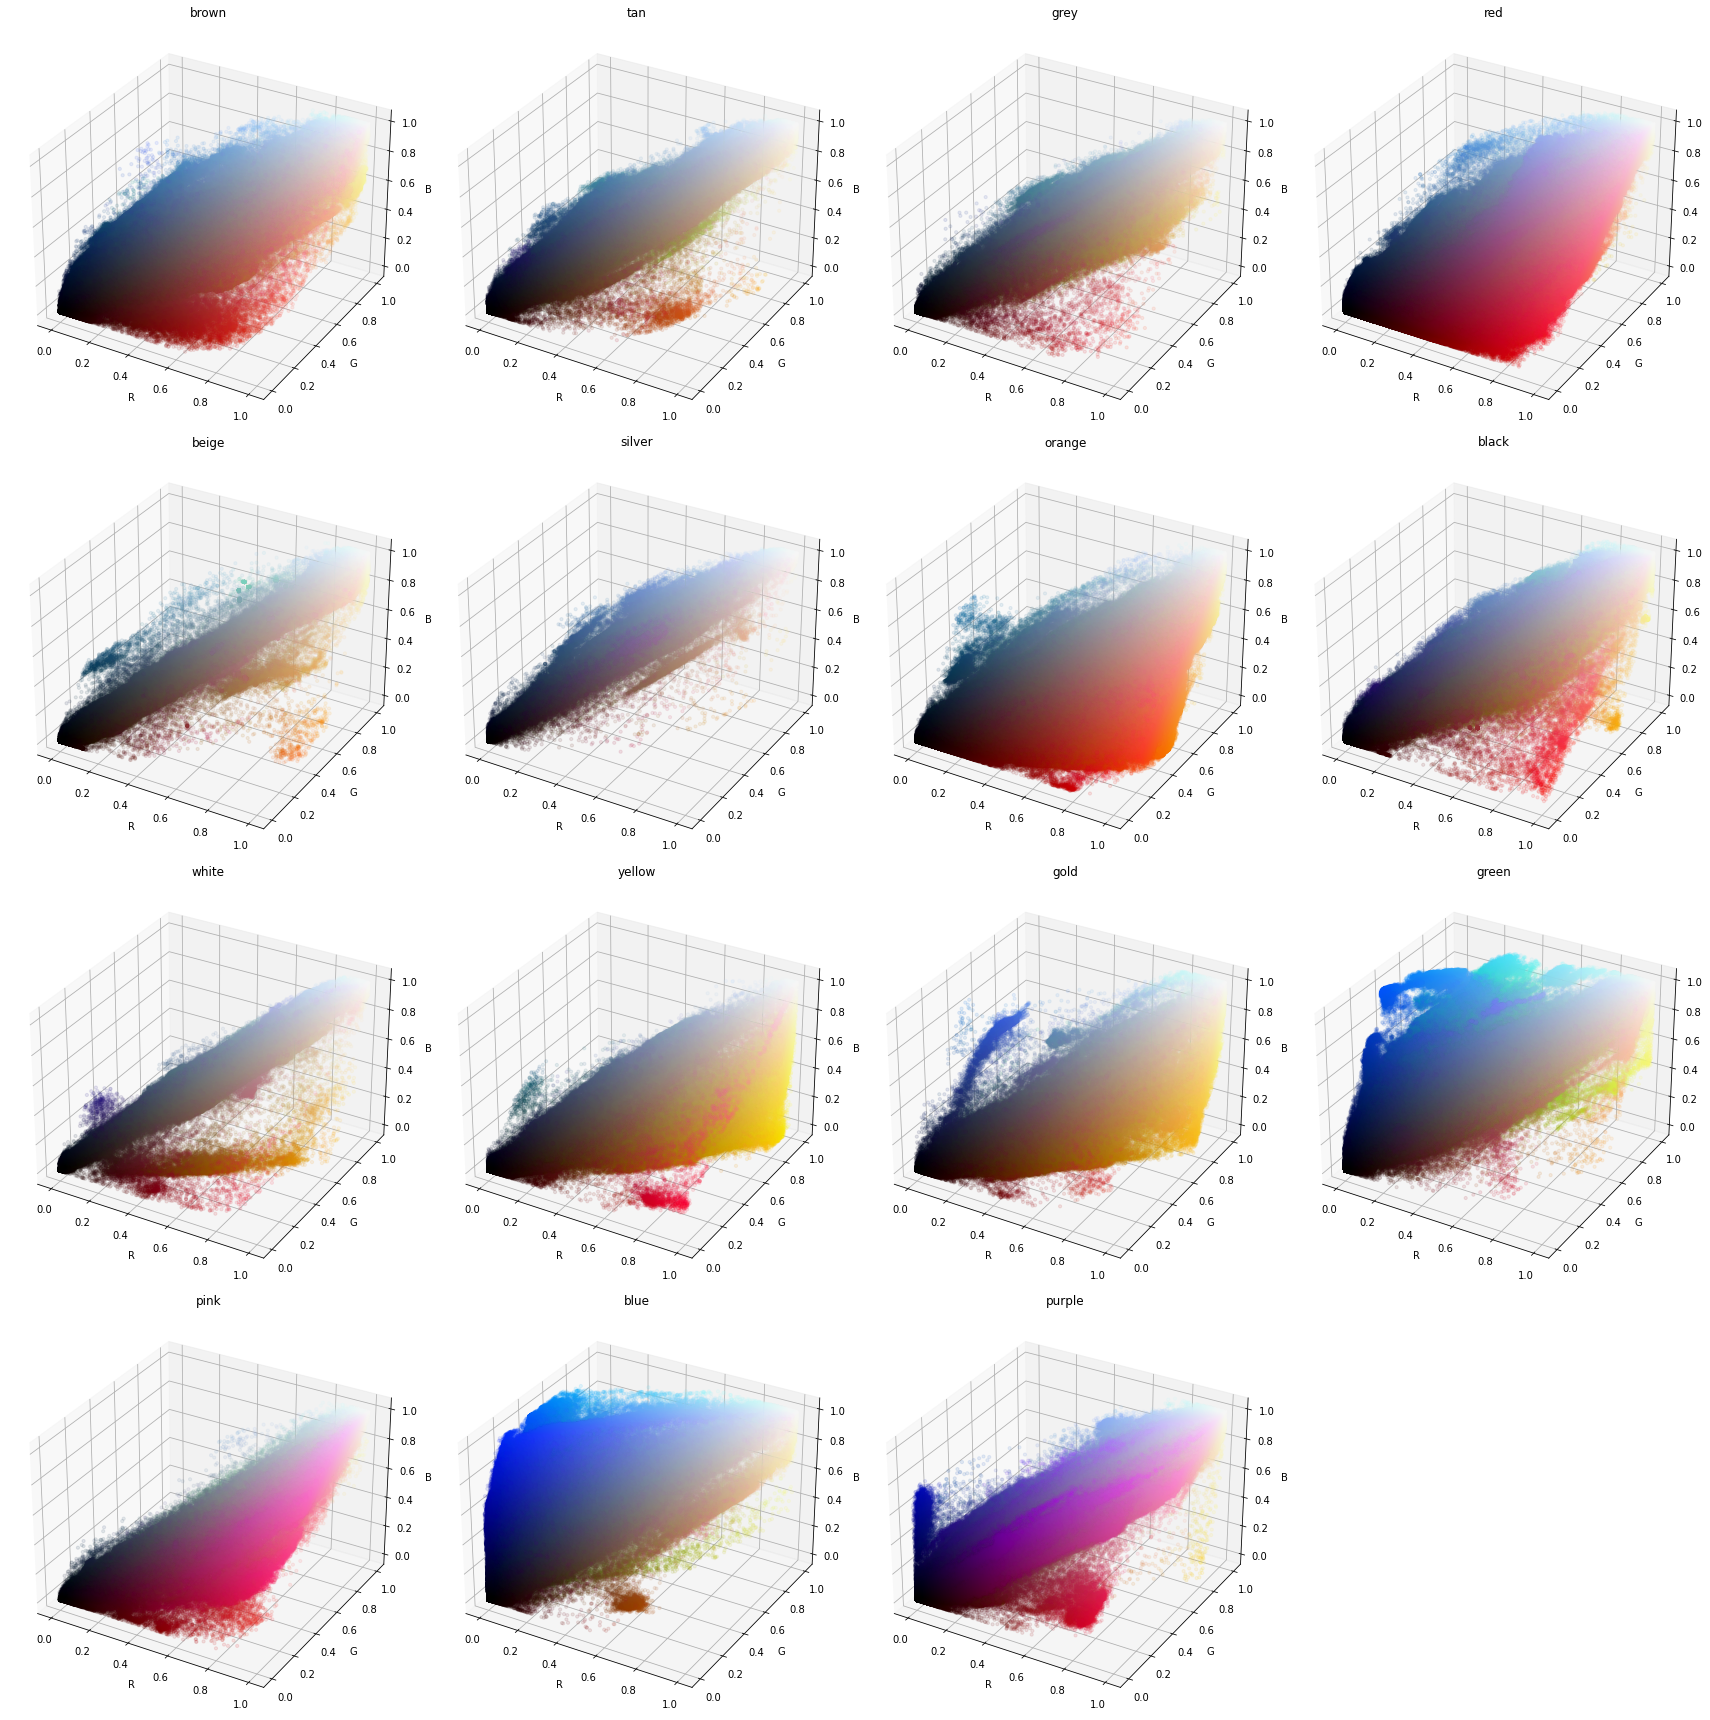

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_scatter(images, title, ax):
    r_values = []
    g_values = []
    b_values = []

    for image in images:
        r_values.extend(image[:, :, 0].ravel())
        g_values.extend(image[:, :, 1].ravel())
        b_values.extend(image[:, :, 2].ravel())

    r_values = np.array(r_values) / 255
    g_values = np.array(g_values) / 255
    b_values = np.array(b_values) / 255
    
    ax.scatter(r_values, g_values, b_values, c=list(zip(r_values, g_values, b_values)), alpha=0.1, marker='o', s=10)

    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    ax.set_title(title)

# Get a list of subdirectories within each dataset
train_labels = os.listdir(training_dataset)

# Determine the number of rows and columns in the grid
n_rows = len(train_labels) // 4 + int(len(train_labels) % 4 != 0)
n_cols = 4

# Create a single figure with multiple subplots
fig = plt.figure(figsize=(n_cols * 6, n_rows * 6))

# For each label (class) in the training dataset
for idx, label in enumerate(train_labels):
    label_path = os.path.join(training_dataset, label)
    image_files = os.listdir(label_path)[:10]  # Limit the number of images per class to 10

    images = []
    for image_file in image_files:
        image_path = os.path.join(label_path, image_file)
        image = plt.imread(image_path)
        images.append(image)

    ax = fig.add_subplot(n_rows, n_cols, idx+1, projection='3d')
    plot_3d_scatter(images, label, ax)

# Adjust the layout and display the figure
plt.tight_layout()
plt.show()


### 7 - Noise frequency in the dataset

The compute_noise function takes a grayscale image as input, computes the Laplacian of the image using OpenCV's Laplacian function, and then returns the variance of the Laplacian. The Laplacian is a filter that highlights areas of rapid intensity change in an image, and the variance of the Laplacian is a measure of how much the intensity values vary in these areas. This measure can be used as an indicator of noise in an image.

The check_for_noise function takes a dataset path as input and iterates over all the image files in the directory using os.walk. For each image file, it reads the image using OpenCV's imread function and computes the Laplacian variance using the compute_noise function. If the Laplacian variance exceeds a threshold of 100, the image is considered noisy, and the script counts the number of noisy and clear images in the dataset. Finally, the function returns the total number of images in the dataset, the number of clear images, the number of noisy images, and a list of all Laplacian variances computed.


The next cell is a pie chart that shows the proportion of noisy and clear images in a testing dataset. It uses the check_for_noise function to count the number of noisy and clear images, and then creates a pie chart with red segments representing noisy images and green segments representing clear images. The chart is displayed with a title using the plt.title function and plt.show(). The pie chart provides a visual representation of the proportion of noisy and clear images in the dataset.

The last cell generates a histogram that shows the distribution of noise in the testing dataset. It uses the plt.hist function to bin the Laplacian variances into 50 equally spaced intervals and displays the resulting histogram with blue bars. The chart is displayed with a title using the plt.title function and labels for the x-axis and y-axis using the plt.xlabel and plt.ylabel functions. The histogram provides insights into the nature and distribution of noise in the dataset.

In [ ]:
# Function to compute the variance of the Laplacian of a grayscale image
def compute_noise(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    laplacian = cv2.Laplacian(gray, cv2.CV_64F)
    return laplacian.var()

# Function to check if images in a dataset are noisy
def check_for_noise(dataset_path):
    num_images = 0
    noisy_images = 0
    laplacian_variances = []
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.jpeg') or file.endswith('.png'):
                num_images += 1
                img_path = os.path.join(root, file)
                img = cv2.imread(img_path)
                noise = compute_noise(img)
                laplacian_variances.append(noise)
                if noise > 100:
                    noisy_images += 1
    clear_images = num_images - noisy_images
    return num_images, clear_images, noisy_images, laplacian_variances

# Path to your dataset
testing_dataset = '/content/carcolourdataset/test'



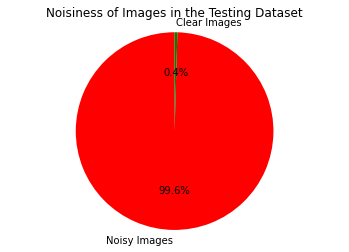

In [ ]:
# Plot the count of noisy images in the testing dataset
num_images, num_clear_images, num_noisy_images, laplacian_variances = check_for_noise(testing_dataset)
labels = ['Noisy Images', 'Clear Images']
sizes = [num_noisy_images, num_clear_images]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Noisiness of Images in the Testing Dataset')
plt.show()

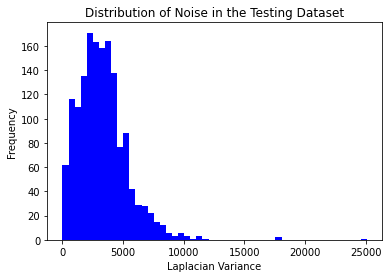

In [ ]:
# Plot the frequency of the noise in the testing dataset
plt.hist(laplacian_variances, bins=50, color='blue')
plt.title('Distribution of Noise in the Testing Dataset')
plt.xlabel('Laplacian Variance')
plt.ylabel('Frequency')
plt.show()

### 8 - Blur frequency in the dataset

This code defines two functions, compute_blur(image) and check_for_blur(dataset_path, blur_threshold), that are used to detect blurry images in a dataset of images.

The compute_blur(image) function takes an image as input, converts it to grayscale using OpenCV's cv2.cvtColor() function, and then applies the Laplacian operator using cv2.Laplacian() function to the grayscale image to get a measure of its sharpness. Finally, the variance of the Laplacian operator is returned.

The check_for_blur(dataset_path, blur_threshold) function takes the path to a dataset of images and a threshold value for the Laplacian variance. It then loops through each image in the dataset and checks its Laplacian variance using the compute_blur() function. If the variance is below the threshold value, the image is considered blurry and its path is added to a list of blurry images. In addition, the Laplacian variances for all images are stored in a separate list and returned along with the list of blurry images.

The next cell creates a pie chart to show the percentage of blurry images in a training dataset. It calculates the number of blurry and clear images, sets the labels and colors for the pie chart, and uses plt.pie() to create the chart. Finally, it sets the title and displays the chart using plt.show()

In [ ]:
def compute_blur(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return cv2.Laplacian(gray, cv2.CV_64F).var()

def check_for_blur(dataset_path, blur_threshold):
    blurry_images = []
    laplacian_variances = []
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)
                blur = compute_blur(img)
                laplacian_variances.append(blur)
                if blur < blur_threshold:
                    blurry_images.append(img_path)
    return blurry_images, laplacian_variances


# Path to your dataset
training_dataset = '/content/carcolourdataset/train'

# Set the blur threshold and check for blurry images
blur_threshold = 100
blurry_images, laplacian_variances = check_for_blur(training_dataset, blur_threshold)

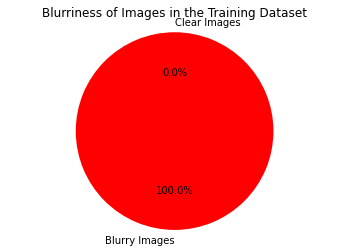

In [ ]:
# Plot the count of blurry images
num_blurry_images = len(blurry_images)
num_clear_images = max(len(os.listdir(training_dataset)) - num_blurry_images, 0)
labels = ['Blurry Images', 'Clear Images']
sizes = [num_blurry_images, num_clear_images]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Blurriness of Images in the Training Dataset')
plt.show()

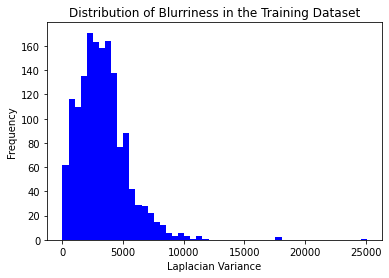

In [ ]:
# Plot the frequency of blurry images based on the Laplacian Variance
plt.hist(laplacian_variances, bins=50, color='blue')
plt.title('Distribution of Blurriness in the Training Dataset')
plt.xlabel('Laplacian Variance')
plt.ylabel('Frequency')
plt.show()

### 9 - Dataset image resizing and padding

This code is used for resizing all images in a dataset to a common size of 256x256 pixels while preserving the original proportions. It does this by first defining a function called resize_with_padding which takes an image and a desired size as inputs. This function resizes the image while preserving the original proportions by padding the image with black pixels to fill any empty space that is created when resizing. It then returns the resized image.

The second function called resize_dataset takes a dataset path and a size as inputs. It loops through all the images in the dataset and applies the resize_with_padding function to each image, saving the resulting resized image back to its original location.

Finally, the code calls the resize_dataset function to resize the images in the training dataset to a common size of 256x256 pixels.

In [ ]:
# Function to resize an image while preserving the original proportions using padding
def resize_with_padding(image, size):
    h, w = image.shape[:2]
    ratio = size / max(h, w)
    new_h = int(h * ratio)
    new_w = int(w * ratio)
    pad_h = size - new_h
    pad_w = size - new_w
    top = pad_h // 2
    bottom = pad_h - top
    left = pad_w // 2
    right = pad_w - left
    padded = cv2.copyMakeBorder(image, top, bottom, left, right, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    resized = cv2.resize(padded, (size, size))
    return resized

# Function to resize all images in a dataset to a common size while preserving the original proportions
def resize_dataset(dataset_path, size):
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)
                resized = resize_with_padding(img, size)
                cv2.imwrite(img_path, resized)



# Resize the training dataset to a common size of 256x256 pixels
resize_dataset(training_dataset, 256)

Image resizing done


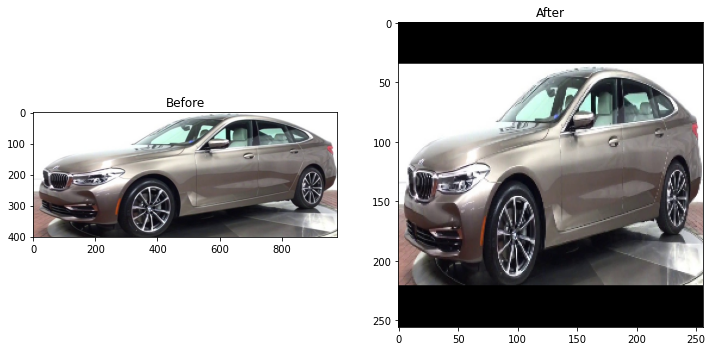

In [ ]:
# Set the path to the beige subfolder
beige_path = "/content/carcolourdataset/test/beige"

# Get the list of images in the beige subfolder
beige_images = [filename for filename in os.listdir(beige_path) if filename.endswith((".jpg", ".jpeg", ".png"))]

# Choose the last image in the list
image_path = os.path.join(beige_path, beige_images[-1])

# Load the original image
orig_image = cv2.imread(image_path)

# Resize and pad the image
resized_image = resize_with_padding(orig_image, 256)

# Plot the before and after images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Before")
ax[1].imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("After")
plt.show()

### 10 - Denoise images

The first function compute_snr(image) computes the signal-to-noise ratio (SNR) of a given image by converting the image to grayscale, computing the mean and standard deviation of the grayscale pixel values using cv2.meanStdDev(), and then computing the SNR using the formula SNR = 20 * log10(mean / stddev). A higher SNR value indicates a higher ratio of signal to noise, which means that the image has less noise.

The second function apply_median_filter(image, filter_size=3) applies a median filter with a specified filter size to a given image using cv2.medianBlur(). Median filtering is a common technique used to reduce noise in an image by replacing each pixel value with the median value of its neighboring pixels.

The third function process_images(dataset_path, snr_threshold, filter_threshold) processes all images in a given dataset by iterating through each image file, loading the image using cv2.imread(), computing the SNR of the image using compute_snr(), and checking if the SNR is below a specified threshold snr_threshold and above a filter threshold filter_threshold. If the SNR is within these thresholds, indicating that the image has some noise but not too much, the function applies a median filter to the image using apply_median_filter() and saves the filtered image back to the same file using cv2.imwrite().

The last line of code calls the process_images() function on the training dataset with snr_threshold of 30 and filter_threshold of 20, which means that the function will only filter images with an SNR value between 20 and 30, indicating that the image has some noise but not too much.

In [ ]:
def compute_snr(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    mean, stddev = cv2.meanStdDev(gray)
    snr = 20 * np.log10(mean[0][0] / stddev[0][0])
    return snr

def apply_median_filter(image, filter_size=3):
    return cv2.medianBlur(image, filter_size)

def process_images(dataset_path, snr_threshold, filter_threshold):
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path)
                snr = compute_snr(img)

                if snr < snr_threshold and snr > filter_threshold:
                    filtered_img = apply_median_filter(img)
                    cv2.imwrite(img_path, filtered_img)

# Check for noise in the training dataset
process_images(training_dataset, 30, 20)


No noisy images found in the dataset.


In [ ]:
# Get the list of images in the beige subfolder
beige_images = [filename for filename in os.listdir(beige_path) if filename.endswith((".jpg", ".jpeg", ".png"))]

# Choose the last image in the list
image_path = os.path.join(beige_path, beige_images[-1])

# Load the original image
orig_image = cv2.imread(image_path)

# Denoise the image using a Gaussian blur filter
denoised_image = apply_median_filter(orig_image)

# Plot the before and after images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Before")
ax[1].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("After")
plt.show()

### 11 - Deblurring images
This code is used to denoise images in a dataset using a Gaussian blur filter.

The first function denoise_image takes an image as input and applies a Gaussian blur filter to it using cv2.GaussianBlur function from the OpenCV library. The filter size is set to (3,3) and the standard deviation is set to 0.

The second function denoise_dataset takes a dataset path as input and loops through all the images in the dataset. It first gets the class name and then loops through all the images in that class. For each image, it reads it using cv2.imread, applies the denoise_image function to it, and writes the denoised image back to the same file using cv2.imwrite.

Finally, the denoise_dataset function is called with the training dataset path as an argument. After the denoising is completed, it prints "Image deblurring is done".

In [ ]:
# Function to deblur an image using Wiener deconvolution
def deblur_image(image):
    # Define point spread function (PSF) for motion blur
    psf = np.ones((15, 15)) / 225

    # Apply motion blur to image using PSF
    blurred = convolve2d(image, psf, mode='same')

    # Compute Wiener filter using estimated noise variance and PSF
    signal_var = np.var(image)
    noise_var = signal_var / 1000
    kernel_var = np.var(psf)
    wiener_filter = np.conj(psf) / (np.abs(psf)**2 + noise_var/kernel_var)

    # Apply Wiener filter to blurred image
    deblurred = np.real(np.fft.ifft2(np.fft.fft2(blurred) * np.fft.fft2(wiener_filter)))

    # Scale pixel values to range [0, 255] and convert to unsigned 8-bit integer
    deblurred = np.uint8(255 * (deblurred - np.min(deblurred)) / (np.max(deblurred) - np.min(deblurred)))

    return deblurred

# Function to deblur all images in a dataset
def deblur_dataset(dataset_path):
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        if os.path.isdir(class_path):
            for filename in os.listdir(class_path):
                img_path = os.path.join(class_path, filename)
                img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                deblurred = deblur_image(img)
                cv2.imwrite(img_path, deblurred)

# Deblur all images in the training dataset
deblur_dataset(training_dataset)
print("Image deblurring is done")

Image deblurring is done


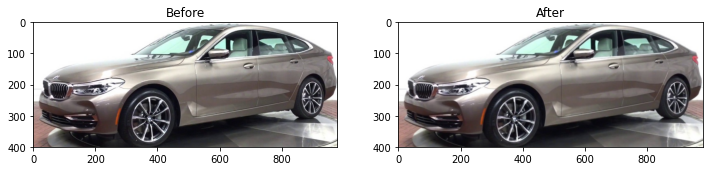

In [ ]:
# Get the list of images in the beige subfolder
beige_images = [filename for filename in os.listdir(beige_path) if filename.endswith((".jpg", ".jpeg", ".png"))]

# Choose the last image in the list
image_path = os.path.join(beige_path, beige_images[-1])

# Load the original image
orig_image = cv2.imread(image_path)

# Denoise the image using a Gaussian blur filter
denoised_image = deblur_image(orig_image)

# Plot the before and after images side by side
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB))
ax[0].set_title("Before")
ax[1].imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
ax[1].set_title("After")
plt.show()